In [9]:
import csv
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
crashes_data =  pd.read_csv("master_data.csv")
states_data = pd.read_csv("states.csv")
crashes_data.head()


,Unnamed: 0,DAY,STATE,ST_CASE,DAY.1,MONTH,MAKE,MODEL,DEATHS,DR_DRINK,...,ROLLOVER,DR_ZIP,DR_HGT,DR_WGT,PREV_DWI,SEAT_POS,EJECTION,DAY_WEEK,REST_USE,REST_MIS
0,0,19,1,10001,19,2,20,421,1,0,...,0,35111,77,250,0,11,1,1,20,0
1,1,14,1,10002,14,2,37,402,1,0,...,9,35601,66,150,0,11,0,3,3,0
2,2,31,1,10003,31,1,82,881,0,0,...,0,30220,73,220,0,11,0,3,3,0
3,3,31,1,10003,31,1,2,404,1,0,...,0,36106,70,218,0,11,0,3,3,0
4,4,31,1,10003,31,1,84,884,0,0,...,0,49242,71,220,0,11,0,3,3,0


In [20]:
# Fatal Crashes by Weather Condition and Light Condition

print(crashes_data.columns)


Index(['Unnamed: 0', 'DAY', 'STATE', 'ST_CASE', 'DAY.1', 'MONTH', 'MAKE',
       'MODEL', 'DEATHS', 'DR_DRINK', 'AGE', 'SEX', 'AIR_BAG', 'DRINKING',
       'DRUGS', 'HOSPITAL', 'DOA', 'DEATH_MO', 'DEATH_YR', 'CITY', 'YEAR',
       'LATITUDE', 'LONGITUD', 'LGT_COND', 'WEATHER1', 'WEATHER2', 'WEATHER',
       'FATALS', 'DRUNK_DR', 'MOD_YEAR', 'ROLLOVER', 'DR_ZIP', 'DR_HGT',
       'DR_WGT', 'PREV_DWI', 'SEAT_POS', 'EJECTION', 'DAY_WEEK', 'REST_USE',
       'REST_MIS'],
      dtype='object')


In [26]:
crashes_by_weather = crashes_data[["ST_CASE","LGT_COND","WEATHER","FATALS"]]

light_condition = {1: "Daylight",
                   2: "Dark but Lighted",
                   3: "Dark",
                   4: "Dawn or Dusk",
                   5: "Unknown",
                   6: "Dark - Unknown Lighting",
                   7: "Other",
                   8: "Not Reported",
                   9: "Unknown"}

weather_condition = {1:"Clear",
                     2:"Rain",
                     10: "Cloudy",
                     99: "Unknown",
                     5: "Fog",
                     4: "Snow",
                     3: "Sleet or Hail",
                     12: "Freezing Rain",
                     11: "Blowing Snow",
                     98: "Not Reported",
                     7: "Blowing Sand, Soil, Dirt",
                     6: "Severe Crosswinds",
                     8: "Other"}

# convert weather condition dictionary into a Dataframe
weather_condition_df= pd.DataFrame(list(weather_condition.items()), columns=["WEATHER","Weather Condition"])

# merge weather condition Dataframe with crashes_by_weather DataFrame
weather_merged = pd.merge(crashes_by_weather, weather_condition_df, on="WEATHER", how="outer")



# rename LGT_COND column to Light Condition
weather_merged = weather_merged.rename(columns={"LGT_COND":"Light Condition"})

weather_merged.head()



#weather_merged_df["Weather Condition"]


,ST_CASE,Light Condition,WEATHER,FATALS,Weather Condition
0,10001,2,1,1,Clear
1,10002,1,1,1,Clear
2,10003,2,1,1,Clear
3,10003,2,1,1,Clear
4,10003,2,1,1,Clear


In [33]:
# group the dataframe based on light condition and weather condition
#weather_merged_group = pd.DataFrame(weather_merged.groupby(["Light Condition","Weather Condition"], as_index=False)["FATALS"].sum()) 
weather_merged_group = pd.DataFrame(weather_merged.groupby(["Light Condition","Weather Condition"], as_index=False)["ST_CASE"].mean()) 

#weather_merged_group = pd.DataFrame(weather_merged.groupby(["Light Condition","Weather Condition"], as_index=False).agg(["FATALS"].sum()) 
weather_merged_reduced = weather_merged_group.loc[lambda weather_merged_group: weather_merged_group['Light Condition'] <=4]



#display the Data Horizontally
weather_merged_df = weather_merged_reduced.pivot_table(weather_merged_reduced, index=["Weather Condition"], columns=["Light Condition"])




#rename the columns(light condition code) in the pivot table to its corresponding description from the light_condition dictionary  
for condition in light_condition: 
   new_name= light_condition[condition]
   weather_merged_df = weather_merged_df.rename(columns={condition : new_name})

    
weather_merged_df = weather_merged_df.drop(['Not Reported',"Other","Unknown"])
weather_merged_df

ST_CASE                                  \
Light Condition                Daylight Dark but Lighted           Dark   
Weather Condition                                                         
Blowing Sand, Soil, Dirt  333852.745763    243951.000000   40205.000000   
Blowing Snow              280427.030303    438970.263158  193526.000000   
Clear                     267737.288490    268648.594080  238231.464101   
Cloudy                    281518.692003    280337.455556  280447.169540   
Fog                       266066.598425    284017.756646  328304.050000   
Freezing Rain             274842.038462    296711.000000  124469.571429   
Rain                      299666.422568    303940.578306  282570.981043   
Severe Crosswinds         251514.130435    197624.307692  272254.333333   
Sleet or Hail             288055.033333    315033.517241  274419.000000   
Snow                      339303.580972    313837.561644  328827.191011   

                                         
Light Condition            Dawn or Dusk  
Weather Condition                        
Blowing Sand, Soil, Dirt  350133.000000  
Blowing Snow                        NaN  
Clear                     248495.024938  
Cloudy                    281377.044053  
Fog                       296613.352273  
Freezing Rain                       NaN  
Rain                      284272.862903  
Severe Crosswinds         415309.500000  
Sleet or Hail                       NaN  
Snow                      352436.523810

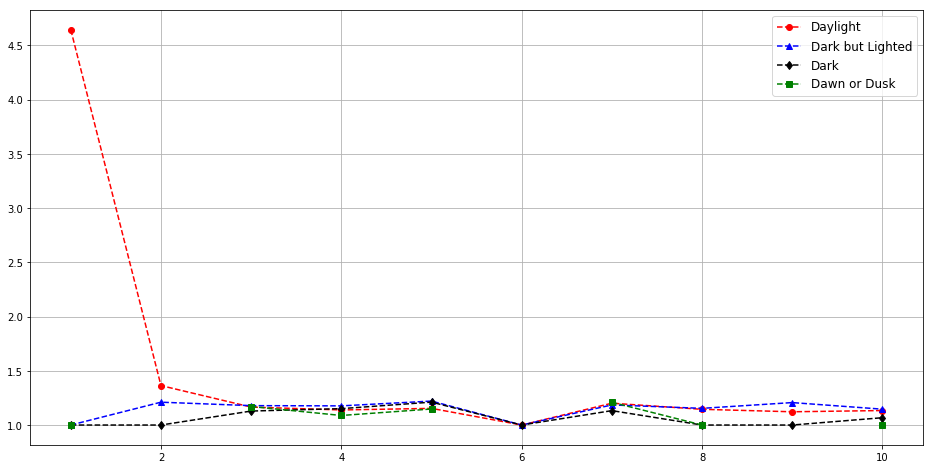

FATALS                                        
Light Condition           Daylight Dark but Lighted      Dark Dawn or Dusk
Weather Condition                                                         
Blowing Sand, Soil, Dirt  4.644068         1.000000  1.000000     1.000000
Blowing Snow              1.363636         1.210526  1.000000          NaN
Clear                     1.165480         1.178708  1.128872     1.170823
Cloudy                    1.138951         1.176628  1.151149     1.088106
Fog                       1.153543         1.220859  1.211111     1.147727
Freezing Rain             1.000000         1.000000  1.000000          NaN
Rain                      1.201167         1.185253  1.132701     1.209677
Severe Crosswinds         1.144928         1.153846  1.000000     1.000000
Sleet or Hail             1.122222         1.206897  1.000000          NaN
Snow                      1.133603         1.146119  1.067416     1.000000

In [130]:
x_axis = np.arange(1,11,1)



plt.figure(figsize=(16,8))

plt.plot(x_axis, weather_merged_df["FATALS"]["Daylight"], "ro", linestyle="dashed")
plt.plot(x_axis, weather_merged_df["FATALS"]["Dark but Lighted"], "b^", linestyle="dashed")
plt.plot(x_axis, weather_merged_df["FATALS"]["Dark"], "kd", linestyle="dashed")
plt.plot(x_axis, weather_merged_df["FATALS"]["Dawn or Dusk"], "gs", linestyle="dashed")

plt.legend(loc='best', fontsize=12, fancybox=True)
plt.grid()
plt.show()

#plt.xticks(locations, labels)
weather_merged_df

          